In [1]:
suppressWarnings(suppressPackageStartupMessages(library(ggplot2)))
suppressWarnings(suppressPackageStartupMessages(library(cowplot)))
suppressWarnings(suppressPackageStartupMessages(library(dplyr)))
suppressWarnings(suppressPackageStartupMessages(library(arrow)))
suppressWarnings(suppressPackageStartupMessages(library(argparse)))

In [34]:
percent_cell_mAP_file_path <- file.path("../results/mAP_cell_percentages.parquet")
across_channels_mAP_file_path <- file.path("../results/mAP_across_channels.parquet")

percent_cell_mAP <- arrow::read_parquet(percent_cell_mAP_file_path)
across_channels_mAP <- arrow::read_parquet(across_channels_mAP_file_path)
dim(percent_cell_mAP)
dim(across_channels_mAP)

[1] 793188     14

[1] 12672    12

In [36]:
# get the first time point only
percent_cell_mAP <- percent_cell_mAP %>% filter(Metadata_Time == "00")

percent_cell_mAP <- percent_cell_mAP %>% group_by(Metadata_treatment, shuffle, percentage_of_cells) %>%
  summarise(mAP = mean(mean_average_precision))

`summarise()` has grouped output by 'Metadata_treatment', 'shuffle'. You can
override using the `.groups` argument.


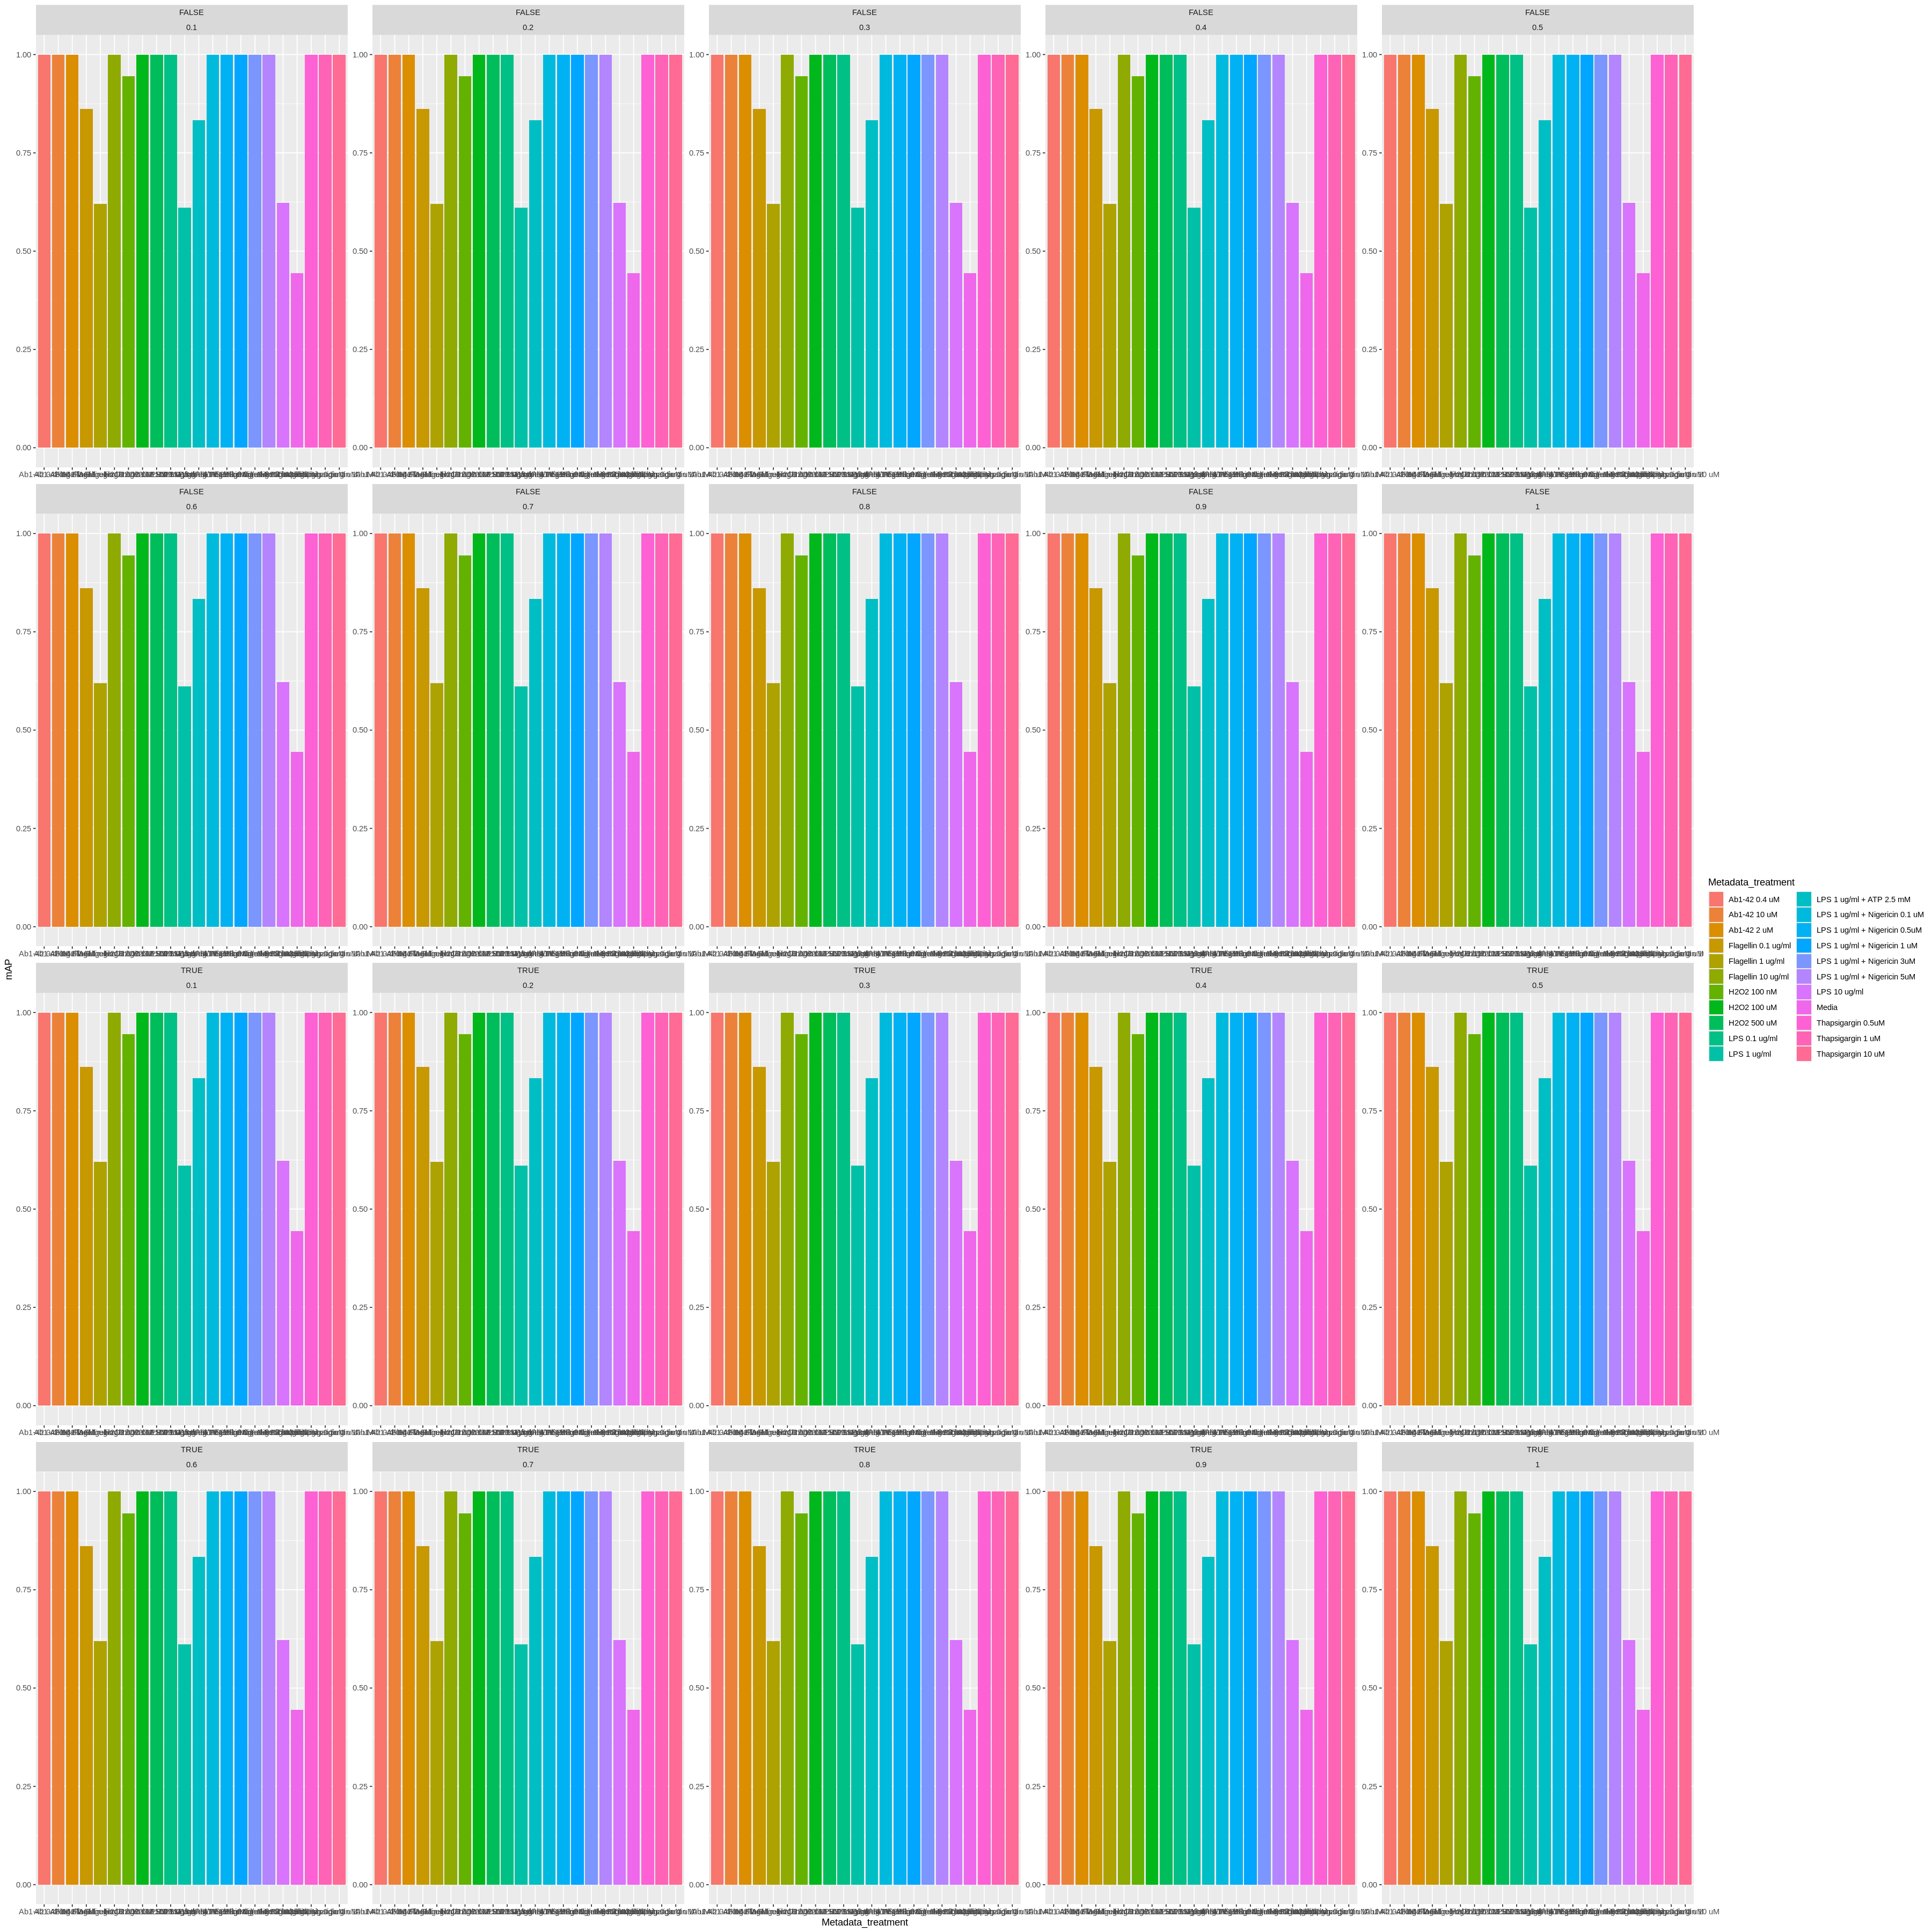

In [43]:
width <- 30
height <- 30
options(repr.plot.width = width, repr.plot.height = height)
percent_cell_plot <- (
    ggplot(data = percent_cell_mAP, aes(x = Metadata_treatment, y = mAP, fill=Metadata_treatment))
    + geom_bar(stat = "identity", position = "dodge")
    + facet_wrap(shuffle~percentage_of_cells, scales = "free")
)
percent_cell_plot

In [23]:
across_channels_mAP <- arrow::read_parquet(across_channels_mAP_file_path)

across_channels_mAP <- across_channels_mAP %>%
  group_by(Metadata_treatment, Metadata_Time, shuffle, Channel) %>%
  summarise(mAP = mean(mean_average_precision))
unique(across_channels_mAP$Metadata_Time)
# selct only 'LPS 1 ug/ml + Nigericin 5uM',
across_channels_mAP <- across_channels_mAP %>%
  filter(Metadata_treatment == 'LPS 1 ug/ml + Nigericin 5uM')

`summarise()` has grouped output by 'Metadata_treatment', 'Metadata_Time',
'shuffle'. You can override using the `.groups` argument.


[1] "00" "01" "02" "03" "04" "05" "06" "07" "08" "09" "10" "11" "12" "13" "14"
[16] "15" "16" "17"

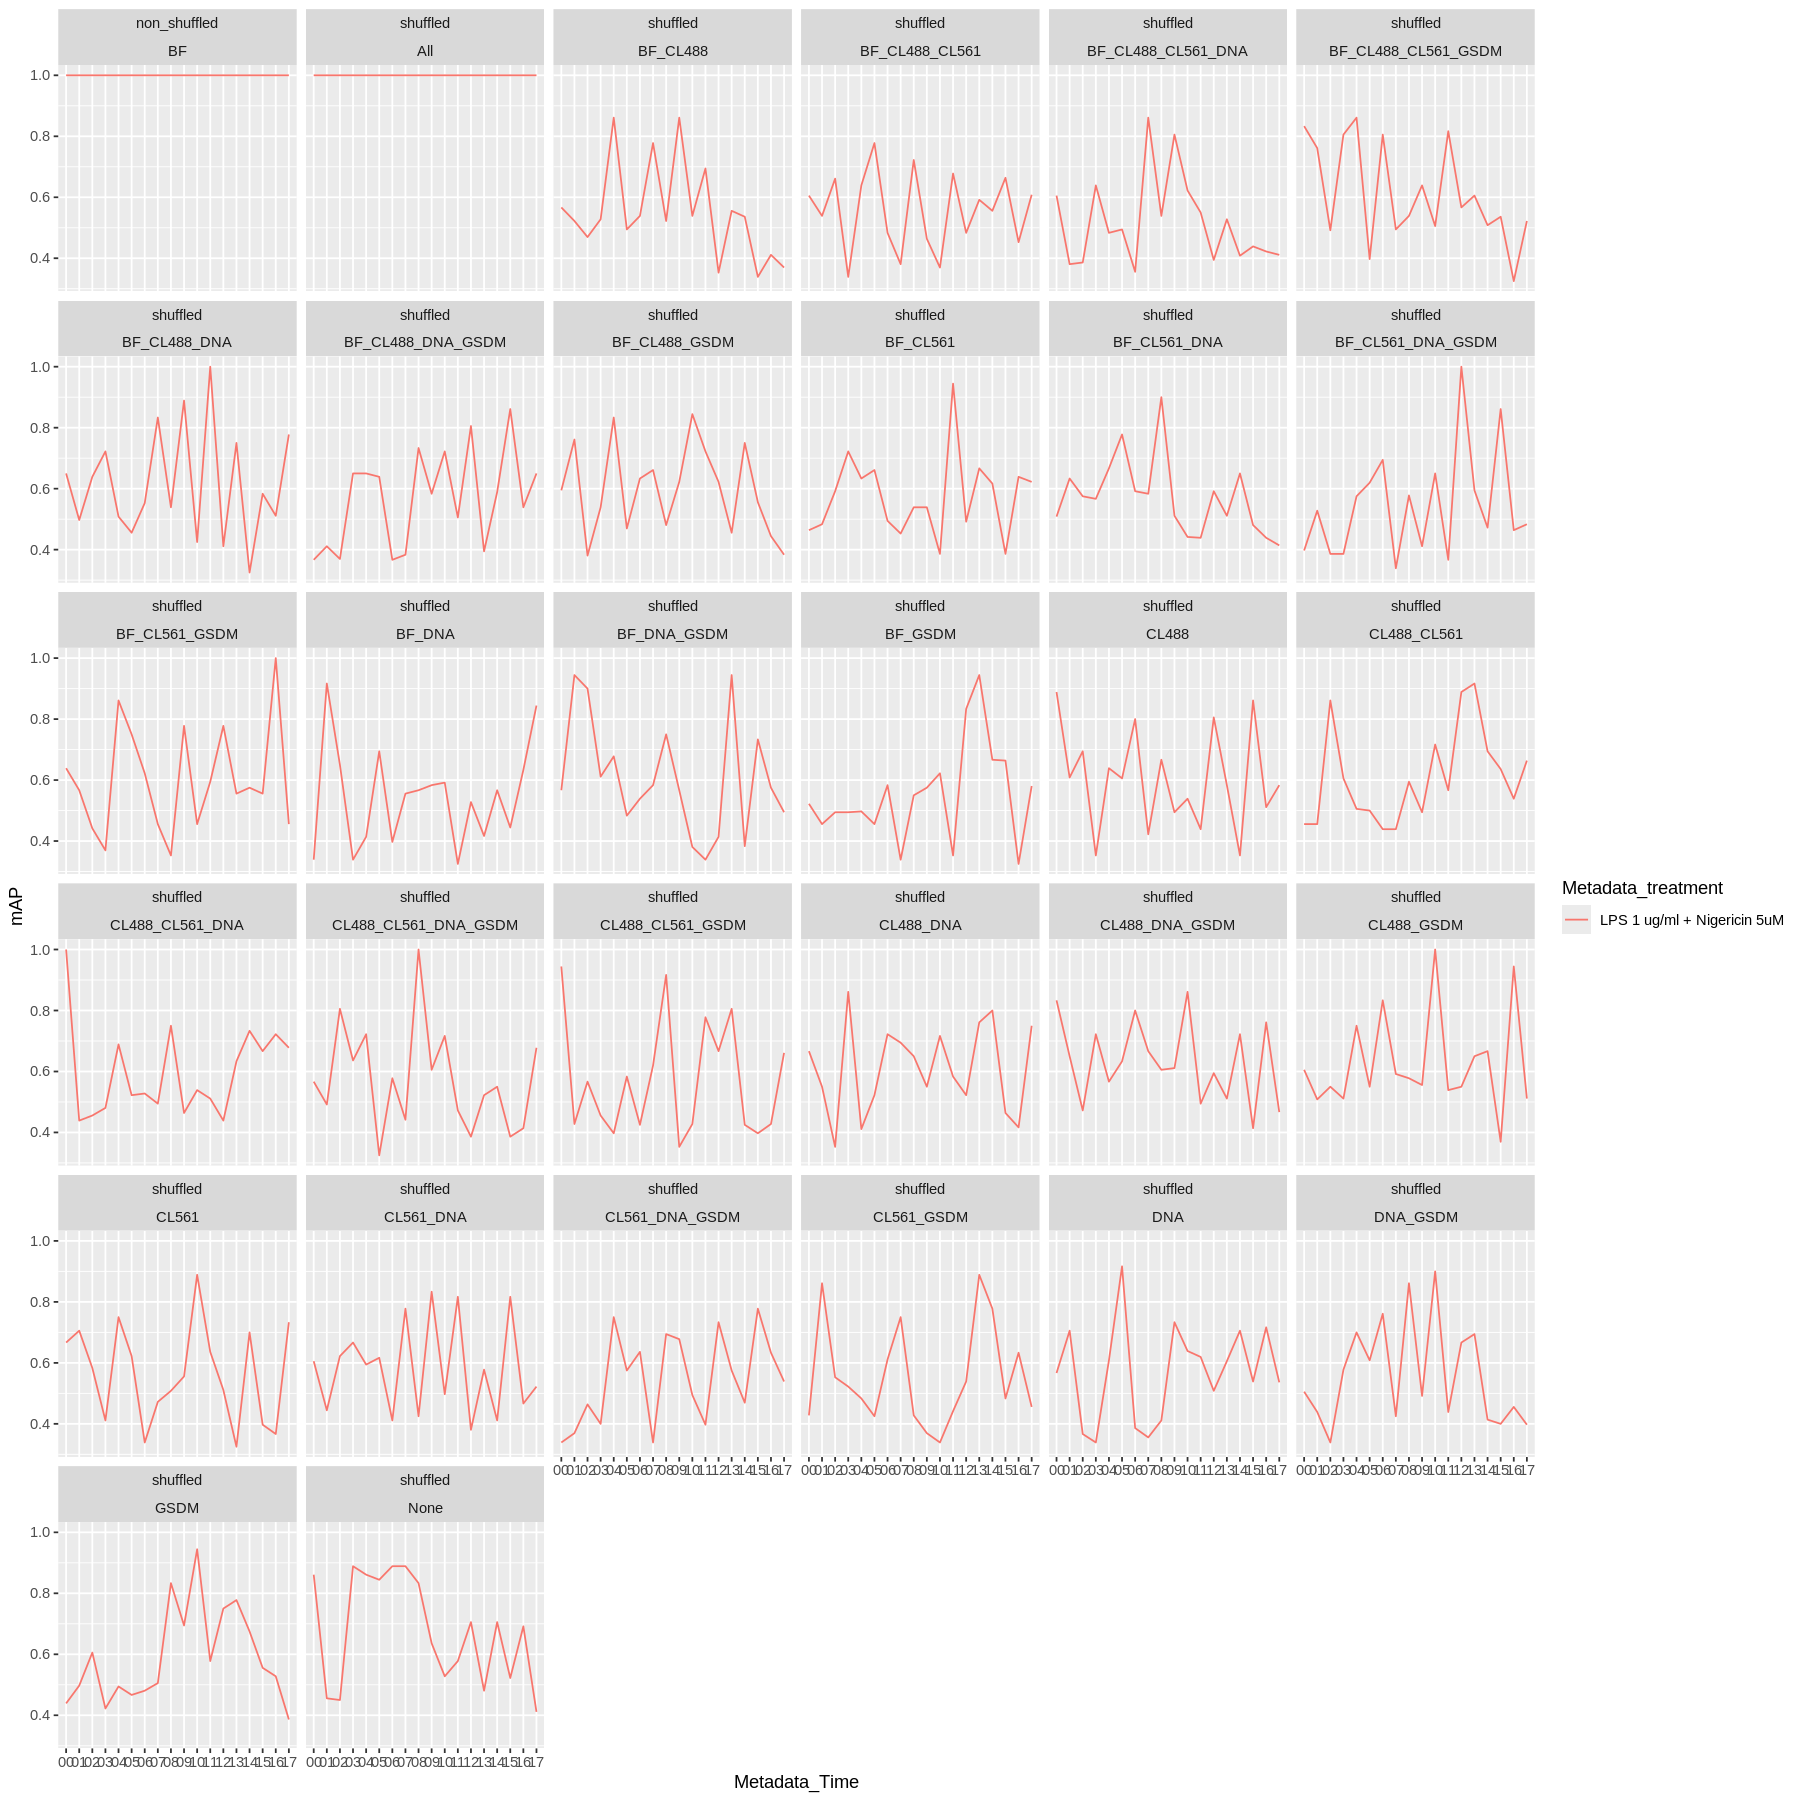

In [24]:
width <- 15
height <- 15
options(repr.plot.width = width, repr.plot.height = height)
channels_mAP_plot <- (
    ggplot(data = across_channels_mAP, aes(x = Metadata_Time, y = mAP))
    + geom_line(aes(group = Metadata_treatment, color = Metadata_treatment))
    + facet_wrap(shuffle ~ Channel)

)
channels_mAP_plot